# Markov Chain Monte Chocolate... wait, what?

In [1]:
import numpy as np
import pandas as pd

# 0. Estimate the value of $\pi$

One way to estimate the value of $\pi$ is to use the Monte Carlo method. The basic idea is to generate random points in a square and use the ratio of points inside a quarter circle to the total number of points to estimate the value of $\pi$. 
You can checkout the gist here: https://www.youtube.com/shorts/DUxvw3_cISo. 

1. Import the random module in Python.
2. Generate $n$ random pairs of $x$ and $y$ coordinates between $0$ and $1$. These coordinates will represent points in a unit square. 
3. Determine how many of the points fall inside the unit circle, which is defined as the set of points that are less than or equal to 1 unit away from the origin (0, 0).
4. Calculate an estimate for $\pi$ by multiplying the ratio of the number of points inside the circle to the total number of points by 4.



In [2]:
n = 100000

points = np.random.uniform(size=[n, 2])
r = np.array([x**2 + y**2 for x, y in points])

pi = 4 * np.sum(r < 1) / n
pi

3.13444

# 1. Chocolate problems

In the file chocolate.csv you have a dataset with ratings of 1700 chocolate bars. The rating system is as follows:

- 5= Elite (Transcending beyond the ordinary limits)
- 4= Premium (Superior flavor development, character and style)
- 3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
- 2= Disappointing (Passable but contains at least one significant flaw)
- 1= Unpleasant (mostly unpalatable)

We’re interested in the probability, that a chocolate is tasty. To check this, we will estimate the proportions of tasty chocolate bars in our dataset. We’ll assume that a chocolate bar is tasty if it’s rating is at least $2$.

Assume that the rating for each chocolate bar is idependent. A random chocolate bar is tasty with probability $θ$. It follows that the number of tasty chocolate bars follows a Binomial distribution $Bin(n,θ)$, where n is the number of inspected bars.




## 1.1 Reminder on MLE:

The MLE for $θ$ is $x/n$, where $x$ is the number of tasty chocolate bars. This is very intuitive: to estimate the proportion of good chocolate bars, we simply compute the proportion from the data.

**Your tasks**
- Estimate θ on the full dataset.
- Suppose that in our sample we have chocolate bars number 126, 1412, 989 and 623. Compute the MLE from this sample.

Overall, vast majority of chocolate bars are tasty. However, when we restricted our analysis to only four observations, we got very different results! Also, they’re not very credbile, because they’re inferred from just 4 chocolate bars. Bayesian analysis allows us to deal with this situation, by using so-called prior information.

In [15]:
data = pd.read_csv('chocolate.csv')
theta = (data.Rating >= 2).sum() / data.shape[0]
print(theta)

0.9905292479108635


## 1.2 Reminder on MAP

Even without any dataset, we know that more often than not chocolate is tasty. This is our prior knowledge about chocolate. Buying $4$ chocolate bars and finding out that $3$ are disgusting wouldn’t change our belief about chocolate in general - rather, we would only conclude that some of the brands are not that good. Intuitively, we know that a sample of $4$ chocolate bars is not enough to say anything about all chocolate - there is considerable amount of uncertainity in our results.

In the Bayesian approach, we treat the parameter $\theta$ as a random variable with some distribution of our choice. The randomness represents our uncertainity about the true value of $\theta$. As we will see, this has several advantages, among others:

- We can incorporate our prior knowledge,
- Small samples won’t lead us to wrong conclusions as much as before,
- We can quantify our uncertainity about the parameters.

As before, we will assume that, if we know $\theta$, the number of tasty chocolate bars follows a binomial distribution $Bin(n,\theta)$. Now, however, we will assume that $\theta$ is itself random, and follows a Beta distribution $Beta(a,b)$. The density of $\theta$, $p(\theta)$, is equal to

$$p(\theta) = \frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a, b)}.$$

Here, $B(a,b)$ is a special function, called the Beta function, and its purpose is to make $p(\theta)$ integrate to $1$. The distribution $p(\theta)$ is called the prior distribution. The parameters $a,b$ have a straightforward interpretation: they are the numbers of tasty and untasty chocolate bars in our prior knowledge. Their sum, $n=a+b$, represents the strength of our prior belief. The fraction $$m=a/(a+b)$$ represent our prior belief about the proportion of tasty chocolate bars. The parameter n represents the strength of our prior knowledge - in other words, the number of chocolate bars we have seen so far to make our opinion and their average tastiness. In yet other words, $n$ is equal to the number of chocolate bars that we would need to inspect to change our beliefs about chocolate tastiness. **Later we will use $n$ and $m$ to re-parametrize the prior. In this parametrization, the prior is $Beta(mn,(1−m)n)$**.

The distribution of the number of tasty chocolate bars conditioned on $\theta$ is denoted $p(x|\theta)$. This is our binomial distribution. The marginal distribution of tasty chocolate bars, $p(x)$, is obtained by intergrating over $\theta$:

$$p(x) = \int_{\theta \in [0, 1]} p(x | \theta) p(\theta) d\theta.$$

This density represents the overall probability of observing $x$ tasty chocolate bars, regardless on the parameter $\theta$. It depends on the parameters $a$ and $b$.

To this point, we’ve covered the prior knowledge and it’s influence on our beliefs about the number of tasty chocolate bars. What about our goal - the estimation of $\theta$? In Bayesian approach, we’re interested in the posterior distribution of our parameters. The posterior distribution is the distribution of $\theta$ conditioned on our observations, $p(\theta|x)$. It measures how our beliefs about the values of $\theta$ are influenced by the data. To get the posterior, we use the Bayes rule (hence the name of the approach):

$$p(\theta | x) = \frac{p(x | \theta) p(\theta)}{p(x)} = \frac{p(x|\theta) p(\theta)}{\int_{\theta \in [0, 1]} p(x | \theta) p(\theta) d\theta}.$$

Note that $\theta$ in the numerator is not the same as $\theta$ in the denominator - the former is set by us, the latter is a variable under the integral.




**Your tasks**

Personally, I believe that 99% of chocolate bars are tasty, and you would need to show me 100 disgusting bars to change my beliefs. 
Interpret my beliefs in terms of the parameters of the prior Beta distribution. 

Check how my beliefs would change if you’d give me the bars number 126, 1412, 989 and 623 (check how many of these four are untasty and how many are tasty). What about all the 1700 bars? 
Plot the prior and the two posterior densities.

Reminder:

The posterior distribution is $Beta(a+X,b+N−X)$

## 1.3 Monte Carlo approach to Chocolate

In reality, I’m not exactly sure how many bars I’d need to check to change my beliefs. However, I could say that this number is a random variable itself. This leads us to a hierarchical model, which has several “layers” of randomness. 

I’ve told you that I assume that 90% bars are tasty, and I’d need 20 bars to change my beliefs. This lead to $m=0.9$ and $n=20$. As I mentioned, in reality I’m not exactly sure if $n=20$ - maybe it’s 21 or 18? In fact, it’s reasonable to assume that m and n are random as well. This leads us to the notion of hierarchical models, which have multiple layers of randomness.

As before, let $X$ be the number of tasty chocolate bars, and assume that $X∼Bin(n,θ)$ and $θ∼Beta(nm,n(m−1))$. This time, however, we’ll assume that $n$ and $m$ are random. It’s reasonable to assume that $n$ is from Gamma distribution (which is a bit similar to Poisson distribution, but continuous), and $m$ from Beta. The full specification of our model is as follows:

\begin{align}
X & \sim Bin(n, \theta), \\
\theta & \sim Beta(nm, n(1-m)), \\
n & \sim Gamma(s, r), \\
m & \sim Beta(\mu, \nu).
\end{align}

The deterministic variables $s$, $r$, $\mu$ and $\nu$ are called hyperparameters, because they influence the parameter $\theta$. The values of the hyperparameters represent our prior knowledge. **Our goal is to infer the posterior distributions of $\theta$, $n$ and $m$.** This is, however, usually impossible. Instead, we’ll use the Monte Carlo approach to simulate the random parameters from the posterior distribution.

There are many methods to sample from the posterior distributions, the most important being the Metropolis-Hastings algorithm and the Gibbs sampler. Today, we will tackle the Metropolis-Hastings. 

### Implementation of Monte Carlo


Again, the goal here is to to infer the posterior distributions of $\theta$, $n$ and $m$.

We want to estimate the posterior distributions of all three parameters: $\theta$, $n$ and $m$. $n$ measures the influence of $m$ on $\theta$. 
To obtain easily interpretable parameters for $Gamma(s, r)$, note that $Y \sim Gamma(s, r)$, then

\begin{align}
\mathbb{E}X &= s/r \\
Var X & = s/r^2
\end{align}

It follows that

\begin{align}
s & = \mathbb{E}^2 X / Var X \\
r & = \mathbb{E} X / Var X.
\end{align}

Now, recall that n represents the strength of our prior knowledge (the number of chocolate bars we’d need to check to alter our beliefs). So, if we believe that our beliefs are worth about 20±10 chocolate bars, it’s reasonable to parametrize the prior by specifying

\begin{align}
s & = 10^2 / 10^2 = 1 \\
r & = 10 / 10^2 = 0.1.
\end{align}


Remember about the restrictions for parameters (e.g. $n≥0$)

Hint: you can use $torch.distributions$ here if you want, but it might be more convenient to use $scipy.stats$.

In [40]:
import numpy as np
from scipy.stats import binom, gamma, beta
from tqdm import tqdm

choco = pd.read_csv('chocolate.csv')

# Set the hyperparameters
prior_n = 20
prior_m = 0.9
nu = 2
mu = 4
s = 1
r = 0.1

# Set the observed data
N = len(choco) # number of tested chocolate bars
X = sum(choco['Rating'] >= 2) # number of tasty bars (maybe you can tweak it and set your expectations higher?)



In [41]:
# Define the posterior distribution as a function of the parameters
def posterior(n, m, theta):
  # Compute the likelihood of the observed data
  likelihood = binom(N, theta).pmf(X)
  
  # Compute the prior distribution of the parameters
  prior_n = gamma(s, r).pdf(n)
  prior_m = beta(mu, nu).pdf(m)
  prior_theta = beta(n*m, n*(1 - m)).pdf(theta)
  
  # Return the product of the likelihood and the priors as the unnormalized posterior
  return likelihood * prior_n * prior_m * prior_theta


In [80]:
# Initialize the MCMC chain with a random state
np.random.seed(1234)

n = prior_n # 0 < n
m = prior_m # 0 <= m <= n
theta = np.random.beta(prior_n * prior_m, prior_n * (1 - prior_m)) # 0 < theta 1

# Set the number of iterations for the MCMC algorithm
num_iterations = 100000

# Define empty lists to store the samples from the posterior
n_samples = [n]
m_samples = [m]
theta_samples = [theta]

sigma_n = 1 
current_posterior = posterior(n, m, theta)
# Run the MCMC algorithm
for i in tqdm(range(num_iterations)):
    # Propose new values for the parameters
    # Hint: there are many ways to do this 
    # TODO
    n_proposed = n + 0.2 * np.random.randn()
    m_proposed = m + 0.02 * np.random.randn()
    theta_proposed = theta + 0.02 * np.random.randn()
    
    # Compute the unnormalized posterior probability at the current state and the proposed state
    # TODO
    proposed_posterior = posterior(n_proposed, m_proposed, theta_proposed)
    
    # Compute the acceptance probability
    # TODO
    prob = proposed_posterior / current_posterior
    
    # Sample a uniform random variable
    # TODO
    u = np.random.rand()
    # If the random variable is less than the acceptance probability, move to the proposed state
    # TODO
    if (u < prob or prob > 1):
        n = n_proposed
        m = m_proposed
        theta = theta_proposed
        current_posterior = proposed_posterior

    # Save the current state in the samples
    # TODO
    n_samples.append(n)
    m_samples.append(m)
    theta_samples.append(theta)

# Compute the posterior means of the samples
n_mean = np.mean(n_samples)
m_mean = np.mean(m_samples)
theta_mean = np.mean(theta_samples)
print(n_mean)
print(m_mean)
print(theta_mean)

100%|█████████████████████████████████████████████████████████████████████████████| 100000/100000 [02:46<00:00, 600.43it/s]

1.8785494305423822
0.7395463232499664
0.9903603876201313


### Optional extensions

- Implement burn in
- Implement thinning out 

In [81]:
samples = np.array([n_samples, m_samples, theta_samples]).T

# Burn in
burn_in = 20000
samples = samples[burn_in:,:]

# Thinning out
every = 10
samples = samples[::10,:]

## 1.4. MCMC diagnostics 

Valid inferences from sequences of MCMC samples are based on the assumption that the samples are derived from the true posterior distribution of interest. Theory guarantees this condition as the number of iterations approaches infinity. It is important, therefore, to determine the minimum number of samples required to ensure a reasonable approximation to the target posterior density. Unfortunately, no universal threshold exists across all problems, so convergence must be assessed independently each time MCMC estimation is performed. The procedures for verifying convergence are collectively known as convergence diagnostics. (see more here: https://pymcmc.readthedocs.io/en/latest/modelchecking.html)

### 1.4.1 Trace
Plot a trace of the MCMC samples. 

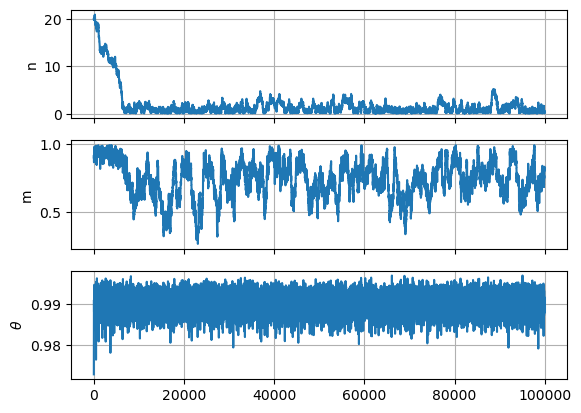

In [82]:
import matplotlib.pyplot as plt

fig, [ax1,ax2,ax3] = plt.subplots(3, 1, sharex=True)

ax1.plot(n_samples)
ax1.set_ylabel(r"n")
ax1.grid()

ax2.plot(m_samples)
ax2.set_ylabel(r"m")
ax2.grid()

ax3.plot(theta_samples)
ax3.set_ylabel(r"$\theta$")
ax3.grid()

### 1.4.2 Histogram
Plot a histogram of the MCMC samples.

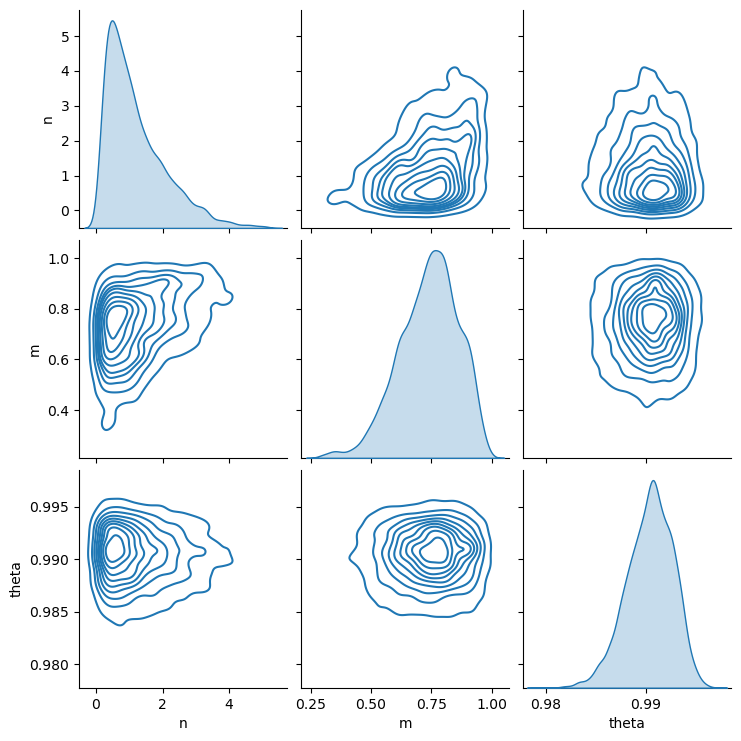

In [86]:
import seaborn as sns
df = pd.DataFrame(samples, columns=["n","m","theta"])
sns.pairplot(data=df, kind='kde')

### 1.4.3 Autocorrelation

Samples from MCMC algorithms are ususally autocorrelated, due partly to the inherent Markovian dependence structure. For now, we will study individual variables within a model. Plot the autocorrelation for the three inferred variables using $plt.acorr$ with parameter $maxlags$. 

Text(0, 0.5, '$\\theta$')

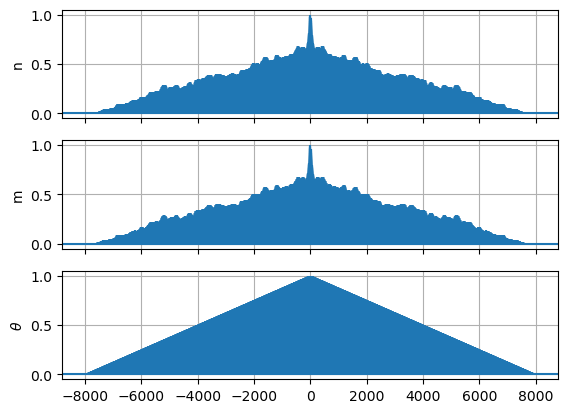

In [89]:
n_samples = samples[:,0]
m_samples = samples[:,1]
theta_samples = samples[:,2]

fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True)
ax1.acorr(n_samples, maxlags=None)
ax1.set_ylabel(r"n")
ax1.grid()
ax2.acorr(n_samples, maxlags=None)
ax2.set_ylabel(r"m")
ax2.grid()
ax3.acorr(theta_samples, maxlags=None)
ax3.grid()
ax3.set_ylabel(r"$\theta$")

## HW 

After this lab, write an e-mail to your TA with "[SAD2] Lab9" as a title with:
- The diagnostics plots (trace, histogram, and autocorrelation) for $\theta$ (if you want with thinning out/burn in applied) and your comment on it - is it safe to infer from this chain? 
- What has the model learned about chocolate? Compare prior and posteriors on $m$, $n$.
- Finally, explain the the difference between Metropolis Hastings algorithm and Gibbs sampling.

